## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'

# 5. 데이터 분석
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>

# 5.0. [데이터 분석을 위한 준비과정] 데이터 합치기

#### [5.0.1] 데이터 합치기
* 지금까지 1~4에서 준비한 데이터 파일
    * 버스 정류장 데이터 - df_seoul_bus_station.csv
    * 유동인구 데이터 - df_seoul_moving.csv
    * 구별 등록 인구 데이터 - df_seoul_people.csv
    * 구별 상권 데이터 - df_seoul_business.csv
* 아래 제시되는 'standard' 데이터 프레임을 기준으로 활용하여, 지금까지 1~4에서 준비한 데이터를 각각 불러와서 합쳐 주세요.
* 이후에는 이 합쳐진 데이터 프레임을 기반으로 미션을 수행하기 위한 분석을 진행합니다.

In [302]:
import pandas as pd

In [303]:
# 데이터 합치기 진행 시, 아래 제시되는 정보를 활용하세요.
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [304]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [337]:
# 아래에 코드를 작성하고 결과를 확인합니다.
# '5. 데이터 분석'은 자세한 가이드가 제공되지 않으니, 각자의 방법으로 진행해주세요.
import pandas as pd
import numpy as np

df_seoul_bus_station=pd.read_csv('df_seoul_bus_station.csv',index_col=0)
df_seoul_bus_station

,자치구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,96,8030483,7569213,128.767927,121.371512
1,강동구,369,23,2890053,2830506,99.161194,97.118065
2,강북구,413,70,4825181,4671783,133.020373,128.791504
3,강서구,566,53,4681083,4652828,88.119480,87.587591
4,관악구,466,92,7655819,7792476,154.753674,157.516040
5,광진구,269,44,2749448,2753411,118.352546,118.523137
6,구로구,486,83,4942197,4730992,119.235615,114.140076
7,금천구,345,61,3776658,3581930,123.098370,116.751304
8,노원구,514,60,4353295,4292724,88.476211,87.245168
9,도봉구,359,48,3304305,3211421,106.859356,103.855540


In [306]:
df_seoul_moving=pd.read_csv('df_seoul_moving.csv',index_col=0)
df_seoul_moving.head()

,도착 시군구 코드,평균 시간,평균 인구,총 시간,총 인구
0,11010,21.349599,44.235978,9356120,19385709.60
1,11020,21.012462,44.516072,9306020,19715322.61
2,11030,21.364786,36.903883,8514380,14707082.87
3,11040,21.740324,42.685596,8887140,17449273.95
4,11050,22.474283,46.762548,8625540,17947278.99


In [322]:
df_seoul_people=pd.read_csv('df_seoul_people.csv',index_col=0)
df_seoul_people.head()

,기간,자치구,세대,인구,남성인구,여성인구,한국인,한국인남성,한국인여성,등록외국인,외국인남성,외국인여성,세대당인구,65세이상고령자
0,2022.1/4,종로구,73766,153684,74018,79666,144275,69911,74364,9409,4107,5302,1.96,28064
1,2022.1/4,중구,63767,131450,63869,67581,122173,59448,62725,9277,4421,4856,1.92,24742
2,2022.1/4,용산구,111207,236518,114571,121947,222169,106735,115434,14349,7836,6513,2.00,39461
3,2022.1/4,성동구,134533,291609,141662,149947,285073,138847,146226,6536,2815,3721,2.12,46896
4,2022.1/4,광진구,169483,353110,169525,183585,340707,164346,176361,12403,5179,7224,2.01,52604


In [ ]:
df=pd.merge(df,df_seoul_business,on='자치구')

In [334]:
df_seoul_people=df_seoul_people[['자치구','남성인구','여성인구','인구','65세이상고령자']]
df_seoul_people.head()

,자치구,남성인구,여성인구,인구,65세이상고령자
0,종로구,74018,79666,153684,28064
1,중구,63869,67581,131450,24742
2,용산구,114571,121947,236518,39461
3,성동구,141662,149947,291609,46896
4,광진구,169525,183585,353110,52604


In [309]:
df_seoul_business=pd.read_csv('df_seoul_business.csv',index_col=0)
df_seoul_business

,자치구,택시운송업_사업체수,택시운송업_종사자수,한식 일반 음식점업_사업체수,한식 일반 음식점업_종사자수,용달 화물자동차 운송업_사업체수,용달 화물자동차 운송업_종사자수,부동산 중개 및 대리업_사업체수,부동산 중개 및 대리업_종사자수,두발미용업_사업체수,...,커피전문점_사업체수,커피전문점_종사자수,남녀용 겉옷 및 셔츠 도매업_사업체수,남녀용 겉옷 및 셔츠 도매업_종사자수,기타주점업_사업체수,기타주점업_종사자수,일반 교과 학원_사업체수,일반 교과 학원_종사자수,한식 육류요리 전문점_사업체수,한식 육류요리 전문점_종사자수
0,종로구,215,215,1548,5912,618,646,549,889,261,...,948,3613,400,962,537,1413,110,382,437,1982
1,중구,230,235,1588,6414,300,333,576,1152,339,...,869,3542,10810,24248,381,982,57,175,443,2121
2,용산구,416,523,857,2987,455,466,791,1214,366,...,634,2076,54,317,487,1332,104,573,300,1184
3,성동구,1200,2527,956,2785,1072,1161,801,1453,489,...,547,1859,149,1572,285,621,258,1494,400,1545
4,광진구,1119,1744,963,2861,968,985,871,1313,746,...,590,1887,89,687,633,1577,413,1646,467,1678
5,동대문구,1546,2093,1236,3566,1431,1456,842,1208,611,...,494,1472,211,976,499,1082,302,984,442,1509
6,중랑구,3634,6262,991,2479,1804,1877,738,1104,790,...,381,1037,63,284,535,1000,288,1045,499,1504
7,성북구,1835,2643,973,2822,1312,1335,846,1175,739,...,457,1384,85,454,512,1030,464,1755,365,1334
8,강북구,1713,2589,965,2663,1024,1030,589,867,673,...,358,1095,40,94,580,1275,220,740,362,1176
9,도봉구,2993,5783,672,2009,1571,1574,515,794,600,...,288,837,22,43,258,477,351,1162,302,943


In [310]:
df_seoul_business=df_seoul_business[['자치구','한식 일반 음식점업_종사자수','커피전문점_종사자수','기타주점업_종사자수','택시운송업_종사자수','용달 화물자동차 운송업_종사자수','부동산 중개 및 대리업_종사자수', '두발미용업_종사자수', '남녀용 겉옷 및 셔츠 도매업_종사자수',
                                    '일반 교과 학원_종사자수','한식 육류요리 전문점_종사자수','한식 일반 음식점업_사업체수','커피전문점_사업체수','기타주점업_사업체수','택시운송업_사업체수','용달 화물자동차 운송업_사업체수','부동산 중개 및 대리업_사업체수', '두발미용업_사업체수', '남녀용 겉옷 및 셔츠 도매업_사업체수',
                                    '일반 교과 학원_사업체수','한식 육류요리 전문점_사업체수']]
df_seoul_business.head()

,자치구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수,택시운송업_종사자수,용달 화물자동차 운송업_종사자수,부동산 중개 및 대리업_종사자수,두발미용업_종사자수,남녀용 겉옷 및 셔츠 도매업_종사자수,일반 교과 학원_종사자수,...,한식 일반 음식점업_사업체수,커피전문점_사업체수,기타주점업_사업체수,택시운송업_사업체수,용달 화물자동차 운송업_사업체수,부동산 중개 및 대리업_사업체수,두발미용업_사업체수,남녀용 겉옷 및 셔츠 도매업_사업체수,일반 교과 학원_사업체수,한식 육류요리 전문점_사업체수
0,종로구,5912,3613,1413,215,646,889,480,962,382,...,1548,948,537,215,618,549,261,400,110,437
1,중구,6414,3542,982,235,333,1152,816,24248,175,...,1588,869,381,230,300,576,339,10810,57,443
2,용산구,2987,2076,1332,523,466,1214,777,317,573,...,857,634,487,416,455,791,366,54,104,300
3,성동구,2785,1859,621,2527,1161,1453,851,1572,1494,...,956,547,285,1200,1072,801,489,149,258,400
4,광진구,2861,1887,1577,1744,985,1313,1337,687,1646,...,963,590,633,1119,968,871,746,89,413,467


In [311]:
df=pd.merge(df_seoul_moving,standard)
df=df[['도착 시군구 코드','자치구','평균 시간','평균 인구','총 시간','총 인구']]
df.head()

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구
0,11010,종로구,21.349599,44.235978,9356120,19385709.60
1,11020,중구,21.012462,44.516072,9306020,19715322.61
2,11030,용산구,21.364786,36.903883,8514380,14707082.87
3,11040,성동구,21.740324,42.685596,8887140,17449273.95
4,11050,광진구,22.474283,46.762548,8625540,17947278.99


In [335]:
df=pd.merge(df,df_seoul_bus_station,on='자치구')
df.head()

,자치구,남성인구,여성인구,인구,65세이상고령자,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,종로구,74018,79666,153684,28064,349,114,5468935,5205394,131.889620,125.534028
1,중구,63869,67581,131450,24742,178,110,3776675,3598932,121.020124,115.324511
2,용산구,114571,121947,236518,39461,323,72,4189977,4086474,137.891694,134.485421
3,성동구,141662,149947,291609,46896,435,60,2807280,2746738,96.377369,94.298888
4,광진구,169525,183585,353110,52604,269,44,2749448,2753411,118.352546,118.523137
5,동대문구,172318,180274,352592,62963,306,77,5240565,5115379,131.841430,128.692017
6,중랑구,193623,199977,393600,72851,380,52,3792541,3740923,87.403863,86.214261
7,성북구,212277,230403,442680,75719,602,103,6236424,6231238,123.251922,123.149430
8,강북구,145934,154890,300824,64961,413,70,4825181,4671783,133.020373,128.791504
9,도봉구,154440,163660,318100,65122,359,48,3304305,3211421,106.859356,103.855540


In [336]:
spst.pearsonr(dff['노선갯수'],dff['65세이상고령자'])

KeyError: '65세이상고령자'

In [313]:
df=pd.merge(df,df_seoul_people,on='자치구')
df.head()

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,131.889620,125.534028,74018,79666,153684
1,11020,중구,21.012462,44.516072,9306020,19715322.61,178,110,3776675,3598932,121.020124,115.324511,63869,67581,131450
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,137.891694,134.485421,114571,121947,236518
3,11040,성동구,21.740324,42.685596,8887140,17449273.95,435,60,2807280,2746738,96.377369,94.298888,141662,149947,291609
4,11050,광진구,22.474283,46.762548,8625540,17947278.99,269,44,2749448,2753411,118.352546,118.523137,169525,183585,353110


In [314]:
dff = pd.merge(df, df_seoul_business, on='자치구')
dff

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,...,한식 일반 음식점업_사업체수,커피전문점_사업체수,기타주점업_사업체수,택시운송업_사업체수,용달 화물자동차 운송업_사업체수,부동산 중개 및 대리업_사업체수,두발미용업_사업체수,남녀용 겉옷 및 셔츠 도매업_사업체수,일반 교과 학원_사업체수,한식 육류요리 전문점_사업체수
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,...,1548,948,537,215,618,549,261,400,110,437
1,11020,중구,21.012462,44.516072,9306020,19715322.61,178,110,3776675,3598932,...,1588,869,381,230,300,576,339,10810,57,443
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,...,857,634,487,416,455,791,366,54,104,300
3,11040,성동구,21.740324,42.685596,8887140,17449273.95,435,60,2807280,2746738,...,956,547,285,1200,1072,801,489,149,258,400
4,11050,광진구,22.474283,46.762548,8625540,17947278.99,269,44,2749448,2753411,...,963,590,633,1119,968,871,746,89,413,467
5,11060,동대문구,21.673451,39.942708,8838130,16288077.28,306,77,5240565,5115379,...,1236,494,499,1546,1431,842,611,211,302,442
6,11070,중랑구,23.412789,41.012753,7939300,13907465.59,380,52,3792541,3740923,...,991,381,535,3634,1804,738,790,63,288,499
7,11080,성북구,22.160283,45.816273,9072420,18757182.35,602,103,6236424,6231238,...,973,457,512,1835,1312,846,739,85,464,365
8,11090,강북구,23.811274,39.128470,7649610,12570412.30,413,70,4825181,4671783,...,965,358,580,1713,1024,589,673,40,220,362
9,11100,도봉구,24.489976,37.882283,6995880,10821566.75,359,48,3304305,3211421,...,672,288,258,2993,1571,515,600,22,351,302


In [315]:
dff[['자치구','총 인구','정류소갯수','노선갯수','승차총승객수','하차총승객수','택시운송업_종사자수', '남녀용 겉옷 및 셔츠 도매업_종사자수', '일반 교과 학원_사업체수', '일반 교과 학원_종사자수']]

,자치구,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,택시운송업_종사자수,남녀용 겉옷 및 셔츠 도매업_종사자수,일반 교과 학원_사업체수,일반 교과 학원_종사자수
0,종로구,19385709.60,349,114,5468935,5205394,215,962,110,382
1,중구,19715322.61,178,110,3776675,3598932,235,24248,57,175
2,용산구,14707082.87,323,72,4189977,4086474,523,317,104,573
3,성동구,17449273.95,435,60,2807280,2746738,2527,1572,258,1494
4,광진구,17947278.99,269,44,2749448,2753411,1744,687,413,1646
5,동대문구,16288077.28,306,77,5240565,5115379,2093,976,302,984
6,중랑구,13907465.59,380,52,3792541,3740923,6262,284,288,1045
7,성북구,18757182.35,602,103,6236424,6231238,2643,454,464,1755
8,강북구,12570412.30,413,70,4825181,4671783,2589,94,220,740
9,도봉구,10821566.75,359,48,3304305,3211421,5783,43,351,1162


In [331]:
spst.pearsonr(dff['노선갯수'],dff['승차총승객수'])

PearsonRResult(statistic=0.6666334470342703, pvalue=0.00027389405141950196)

In [333]:
spst.pearsonr(dff['노선갯수'],dff['정류소갯수'])

PearsonRResult(statistic=0.24558356452876356, pvalue=0.23669760082514654)

In [317]:
df=pd.merge(df,df_seoul_business,on='자치구')

In [318]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_14520\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,도착 시군구 코드,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,...,한식 일반 음식점업_사업체수,커피전문점_사업체수,기타주점업_사업체수,택시운송업_사업체수,용달 화물자동차 운송업_사업체수,부동산 중개 및 대리업_사업체수,두발미용업_사업체수,남녀용 겉옷 및 셔츠 도매업_사업체수,일반 교과 학원_사업체수,한식 육류요리 전문점_사업체수
도착 시군구 코드,1.000000,0.533514,0.610548,0.235541,0.473119,0.447511,-0.063829,0.440756,0.441705,0.017980,...,0.299283,0.254269,0.316607,0.257086,0.217631,0.652064,0.668534,-0.313424,0.571740,0.314030
평균 시간,0.533514,1.000000,0.373091,-0.141914,0.095727,0.223747,-0.681891,-0.110113,-0.097082,-0.382202,...,-0.117940,-0.165649,0.093804,0.740287,0.651968,0.320276,0.625962,-0.314802,0.381773,0.169795
평균 인구,0.610548,0.373091,1.000000,0.808313,0.951399,0.374723,0.000899,0.474049,0.463898,-0.079733,...,0.740160,0.729003,0.447947,0.200401,0.073967,0.911058,0.747991,-0.064992,0.745646,0.788592
총 시간,0.235541,-0.141914,0.808313,1.000000,0.923298,0.356947,0.395930,0.581339,0.572769,0.140483,...,0.832907,0.836271,0.444979,-0.200616,-0.219282,0.722944,0.380986,0.126450,0.419533,0.756714
총 인구,0.473119,0.095727,0.951399,0.923298,1.000000,0.355635,0.231451,0.576553,0.558699,0.067920,...,0.859836,0.854651,0.446980,-0.036671,-0.144577,0.888214,0.594490,0.029200,0.653779,0.818619
정류소갯수,0.447511,0.223747,0.374723,0.356947,0.355635,1.000000,0.245584,0.566681,0.578479,-0.135318,...,0.157953,0.240643,0.366972,0.254818,0.163750,0.423486,0.485323,-0.485615,0.347181,0.335055
노선갯수,-0.063829,-0.681891,0.000899,0.395930,0.231451,0.245584,1.000000,0.666633,0.653659,0.497709,...,0.411846,0.401216,0.150711,-0.609725,-0.581854,0.007863,-0.267450,0.282118,-0.152011,0.102316
승차총승객수,0.440756,-0.110113,0.474049,0.581339,0.576553,0.566681,0.666633,1.000000,0.996610,0.538720,...,0.572305,0.488169,0.354584,-0.219573,-0.187823,0.542368,0.357367,-0.151233,0.349527,0.388479
하차총승객수,0.441705,-0.097082,0.463898,0.572769,0.558699,0.578479,0.653659,0.996610,1.000000,0.534826,...,0.546727,0.457139,0.364663,-0.201816,-0.139249,0.524065,0.367160,-0.165922,0.328345,0.373733
승차평균승객수,0.017980,-0.382202,-0.079733,0.140483,0.067920,-0.135318,0.497709,0.538720,0.534826,1.000000,...,0.257587,0.167839,0.068706,-0.703968,-0.452839,0.025778,-0.252539,0.078903,-0.258910,-0.101126


# 5.1.가설 수립

## 5.1.1.가설 수립 
+ 어떤 데이터를 label 데이터(y)로 해야 할 지 생각해보아 정하세요.
    * 설정한 가설에 따라(가설 마다) y는 다를 수 있습니다. 개인/조 마다 y는 다를 수 있습니다.
+ 가설의 개수는 제한이 없습니다. (조 별로 적어도 3개 이상 설정하세요.)
+ 가설 예시
    * 가설 1 정류장 수와 승차 총 승객수
        * H0 : 정류장 수와 승차 총 승객수는 연관이 없다
        * H1 : 정류장 수와 승차 총 승객수는 연관이 있다
    * 가설 2 노선 수와 총 이동시간
        * H0 : 노선 수와 총 이동시간은 연관이 없다
        * H1 : 노선 수와 총 이동시간은 연관이 있다
    * 가설 3 정류장 수와 이동인구(합)
    * 가설 4 노선 수와 평균 이동 시간
    * 가설 5 노선 수와 커피전문점 이용자수

In [289]:
import scipy.stats as spst

In [286]:
# 가설 1 : 정류장 수와 승차 총 승객 수
spst.pearsonr(df['정류소갯수'],df['승차총승객수'])

PearsonRResult(statistic=0.5666813370974585, pvalue=0.0031419773971173358)

In [230]:
# 가설 2 : 노선 수와 총 이동시간
spst.pearsonr(df['노선갯수'],df['총 시간'])

PearsonRResult(statistic=0.3959304735989461, pvalue=0.050087918918418115)

In [172]:
# 가설 3 : 정류장 수와 이동인구(합)
spst.pearsonr(df['정류소갯수'],df['총 인구'])

PearsonRResult(statistic=0.3556345657023647, pvalue=0.08103838386719453)

In [173]:
# 가설 4 : 노선 수와 평균 이동 시간
spst.pearsonr(df['노선갯수'],df['평균 시간'])

PearsonRResult(statistic=-0.6818913474771292, pvalue=0.00017406854527519957)

In [174]:
# 가설 5 : 노선 수와 커피 전문점 종사자 수
spst.pearsonr(df['노선갯수'],df['커피전문점_종사자수'])

PearsonRResult(statistic=0.43183768990598126, pvalue=0.031113682739667404)

In [175]:
spst.pearsonr(df['노선갯수'],df['한식 일반 음식점업_종사자수'])

PearsonRResult(statistic=0.4213267976843828, pvalue=0.035943753508497336)

In [107]:
spst.pearsonr(df['노선갯수'],df['택시운송업_종사자수'])

PearsonRResult(statistic=-0.6650095935668411, pvalue=0.0002870018599696327)

In [132]:
spst.pearsonr(df['노선갯수'],df['용달 화물자동차 운송업_종사자수'])

PearsonRResult(statistic=-0.5724894093277266, pvalue=0.002784023873657822)

In [234]:
spst.pearsonr(df['정류소갯수'],df['남녀용 겉옷 및 셔츠 도매업_사업체수'])

PearsonRResult(statistic=-0.4856146192279807, pvalue=0.013859407137910357)

## 5.1.2.단변량 분석

* 아래 제시되는 내용들을 참고하여 단변량 분석을 진행합니다. 
    * 변수의 비즈니스 의미  
    * 변수가 숫자형인지 범주형인지 판단하여 진행
    * 전처리가 필요한지 확인하고 필요 시 진행: NaN 존재 여부 및 조치 방안, 가변수화 대상여부  
    * 기초통계량 분석
    * 데이터 분포 분석  
    * 위 정보로부터 파악한 내용을 비즈니스 관점에서 정리  
    * 추가 분석해볼 사항 도출하여 추가 분석 진행
* 이 프로젝트에서 비즈니스 관점이라 함은 데이터를 분석하는 목적이 어디에 있는가 하는 것을 고려하자는 것입니다.
    * 즉, "서울시 내 어느 자치구에 버스노선 추가가 필요한지를 분석하여 합리적으로 결정하려는 목적"을 가지고 데이터에 근거하기 위해 데이터를 분석하고 정리해야 한다는 의미입니다.

In [ ]:
df.info()

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [ ]:
# 승차 총 승객수
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='승차총승객수',data=df)
plt.show()

In [ ]:
sns.boxplot(x='승차총승객수',data=df)

In [ ]:
sns.kdeplot(df['승차총승객수'])

In [ ]:
# 이동시간
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='총 시간',data=df)
plt.show()

<Axes: xlabel='총 시간'>

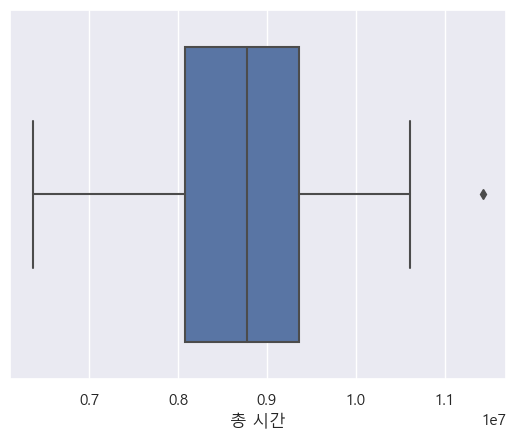

In [28]:
sns.boxplot(x='총 시간',data=df)

<Axes: xlabel='총 시간', ylabel='Density'>

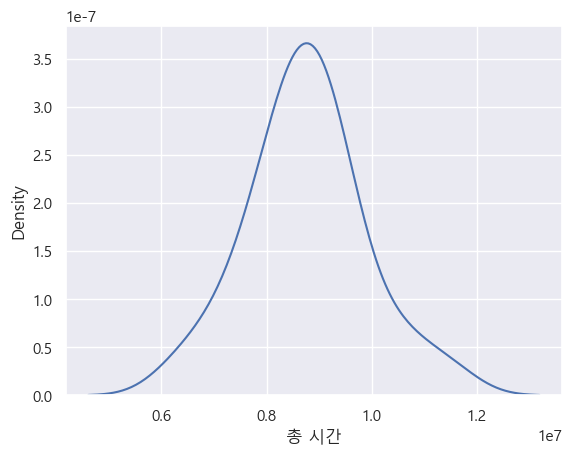

In [29]:
sns.kdeplot(df['총 시간'])

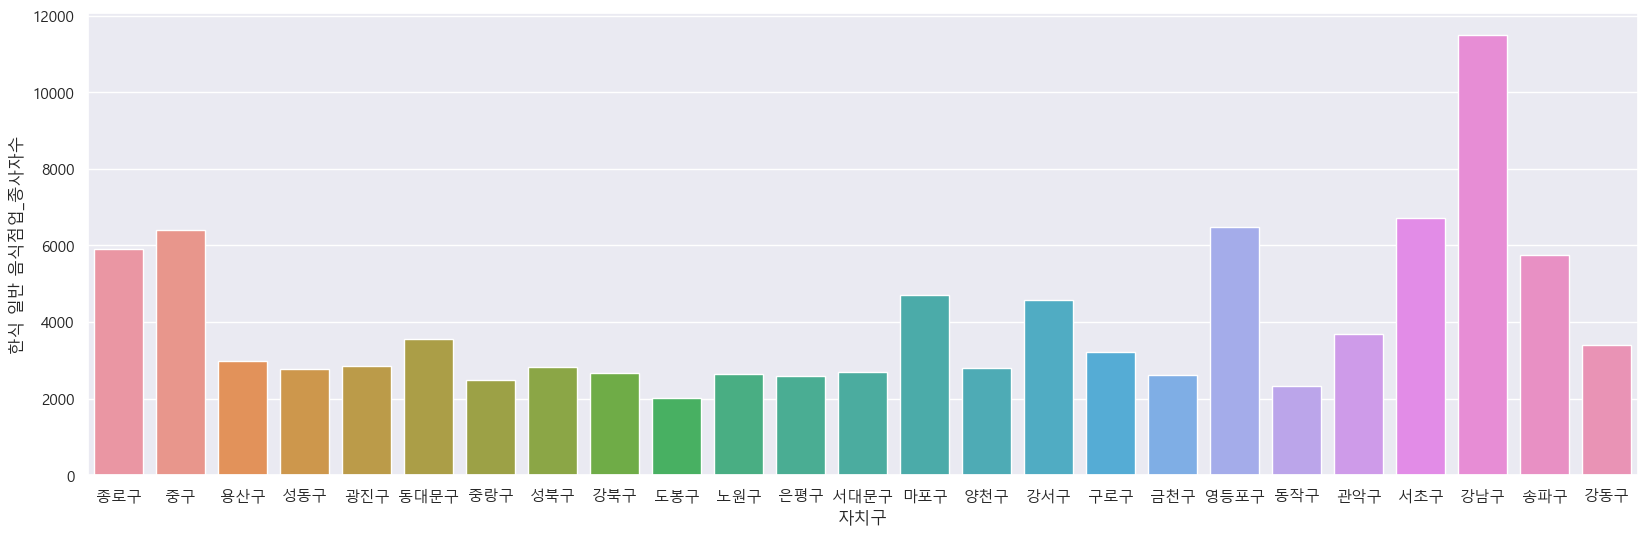

In [30]:
# 한식 음식점
# 이동시간
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='한식 일반 음식점업_종사자수',data=df)
plt.show()

<Axes: xlabel='한식 일반 음식점업_종사자수'>

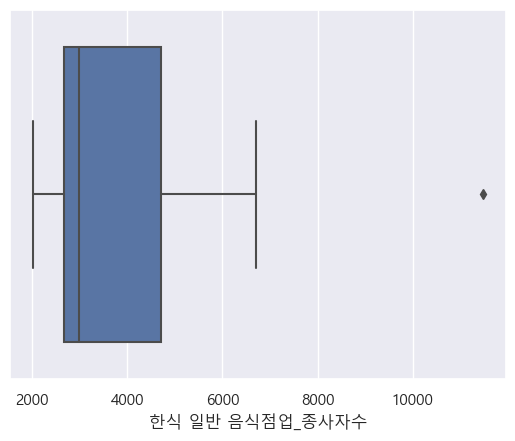

In [31]:
sns.boxplot(x='한식 일반 음식점업_종사자수',data=df)

<Axes: xlabel='한식 일반 음식점업_종사자수', ylabel='Density'>

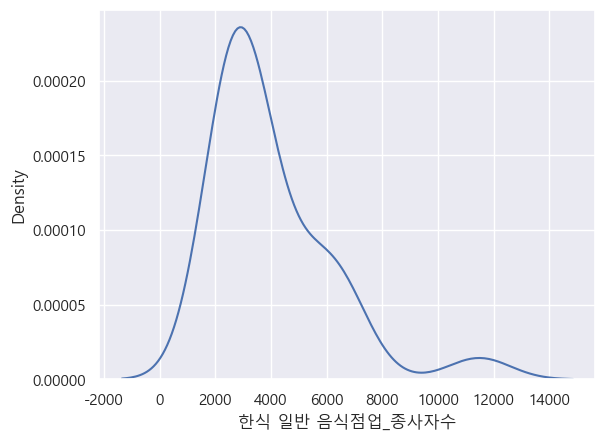

In [32]:
sns.kdeplot(x='한식 일반 음식점업_종사자수',data=df)

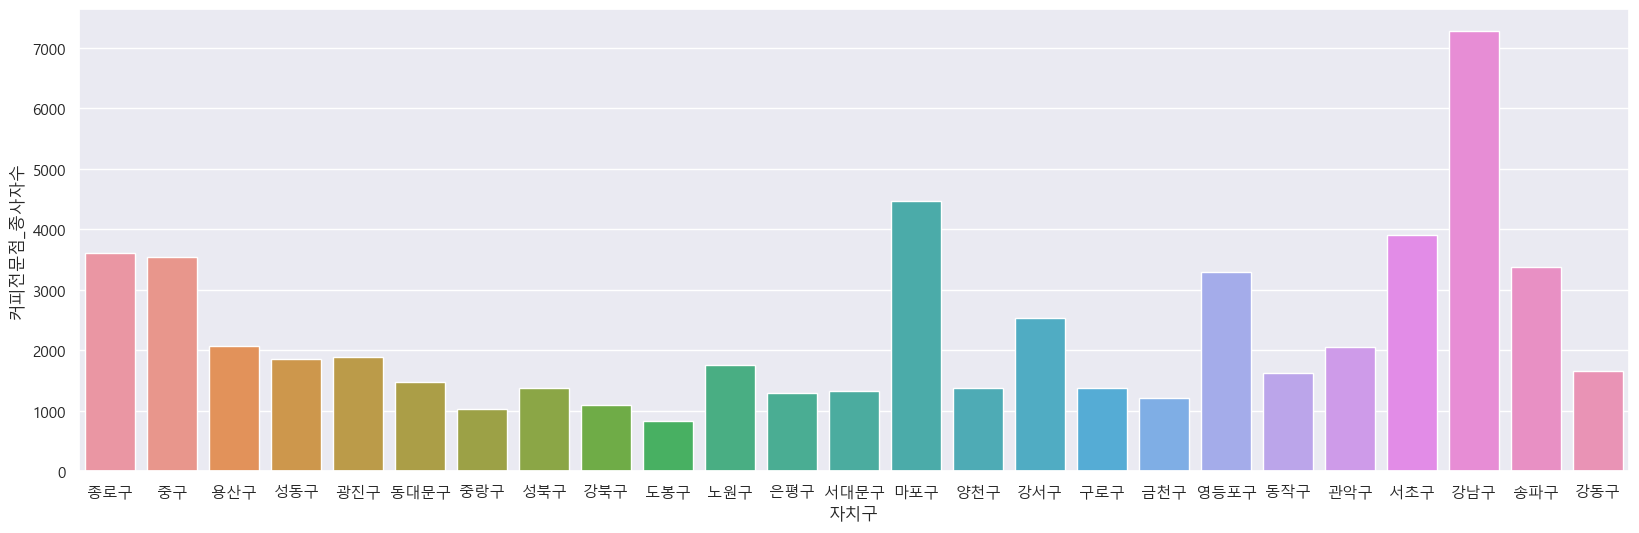

In [33]:
# 커피 음식점
plt.figure(figsize=(20,6))
sns.barplot(x='자치구',y='커피전문점_종사자수',data=df)
plt.show()

<Axes: xlabel='커피전문점_종사자수'>

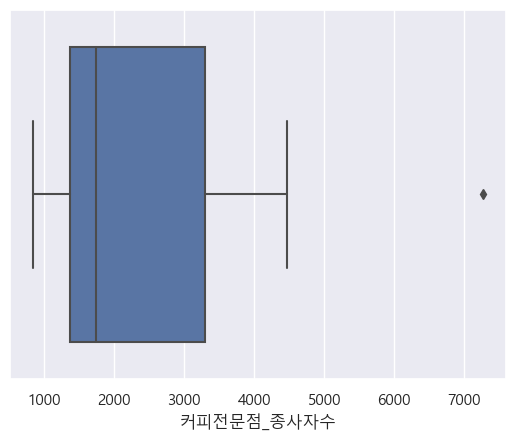

In [34]:
sns.boxplot(x='커피전문점_종사자수',data=df)

<Axes: xlabel='커피전문점_종사자수', ylabel='Density'>

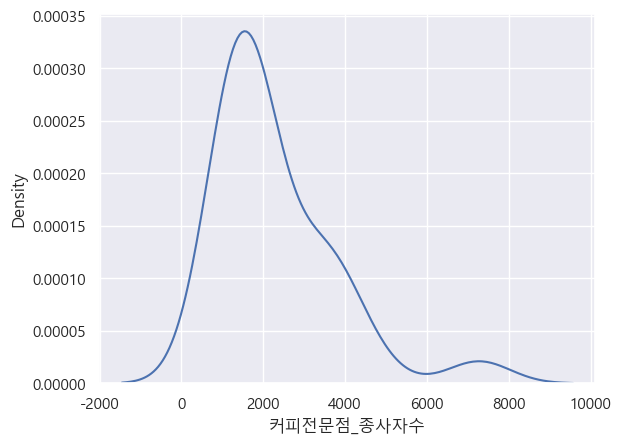

In [35]:
sns.kdeplot(x='커피전문점_종사자수',data=df)

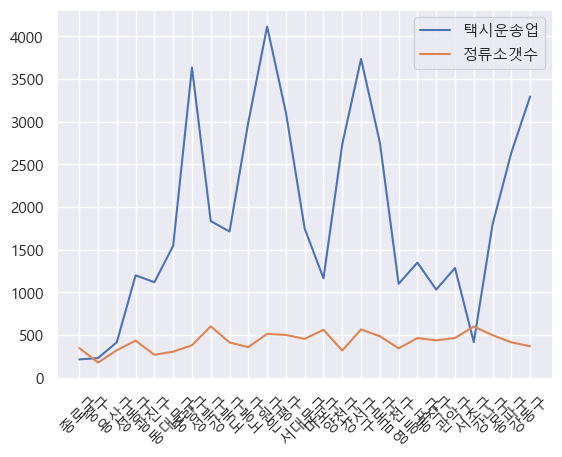

In [329]:
plt.plot(df['자치구'],df['택시운송업_사업체수'],label='택시운송업')
plt.plot(df['자치구'],df["정류소갯수"],label='정류소갯수')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()

## 5.1.3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 시각화와 수치화(가설검정)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
* 상관계수 (우리가 배운 기준)
    * 강한: 0.5 < |r| <= 1
    * 중간: 0.2 < |r| <= 0.5
    * 약한: 0.1 < |r| <= 0.2
    * (거의)없음: |r| <= 0.1
* p-value 기준 판단 기준
    * P-value < 0.05이면, 두 변수 간에 관계가 있다. (상관계수가 의미가 있다.)
    * P-value >= 0.05이면, 두 변수 간에 관계가 없다. (상관계수가 의미가 없다.)

In [ ]:
sns.pairplot(df)

### 1)


### 2)

### 3)

In [ ]:
import scipy.stats as spst

# 아래에 코드를 작성하고 결과를 확인합니다.
new_df=df[['자치구','평균 시간','평균 인구','정류소갯수','노선갯수','승차총승객수','승차평균승객수','남성인구','여성인구','한식 일반 음식점업_종사자수','커피전문점_종사자수','기타주점업_종사자수']]
new_df.corr()

## 5.1.4.관계 정리

### 1) 강한 관계의 변수

강한 관계의 변수는 무엇인가요?
* 정류소 갯수 - 승차총승객수, 승차평균승객수, 남여인구
* 노선갯수 - 승차총승객수, 승차평균승객수, (평균시간)

### 2) 중간 관계의 변수

중간 관계의 변수는 무엇인가요?
* 정류소 갯수 - 평균 인구, 기타주점업_종사자수
* 노선갯수 - 한식 일반 음식점_종사자수, 커피전문점_종사자수, 기타주점업_종사자수

## 5.1.5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇인가요?

In [27]:
df.head()

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,131.889620,125.534028,74018,79666,153684,5912,3613,1413
1,11020,중구,21.012462,44.516072,9306020,19715322.61,178,110,3776675,3598932,121.020124,115.324511,63869,67581,131450,6414,3542,982
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,137.891694,134.485421,114571,121947,236518,2987,2076,1332
3,11040,성동구,21.740324,42.685596,8887140,17449273.95,435,60,2807280,2746738,96.377369,94.298888,141662,149947,291609,2785,1859,621
4,11050,광진구,22.474283,46.762548,8625540,17947278.99,269,44,2749448,2753411,118.352546,118.523137,169525,183585,353110,2861,1887,1577


In [28]:
display(df.sort_values(by='승차총승객수',ascending=True).head())
display(df.sort_values(by='승차평균승객수',ascending=True).head())
display(df.sort_values(by='남성인구',ascending=True).head())
display(df.sort_values(by='여성인구',ascending=True).head())

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
4,11050,광진구,22.474283,46.762548,8625540,17947278.99,269,44,2749448,2753411,118.352546,118.523137,169525,183585,353110,2861,1887,1577
3,11040,성동구,21.740324,42.685596,8887140,17449273.95,435,60,2807280,2746738,96.377369,94.298888,141662,149947,291609,2785,1859,621
24,11250,강동구,25.670084,64.249687,8430800,21101460.33,369,23,2890053,2830506,99.161194,97.118065,227891,237206,465097,3388,1660,1349
9,11100,도봉구,24.489976,37.882283,6995880,10821566.75,359,48,3304305,3211421,106.859356,103.855540,154440,163660,318100,2009,837,477
17,11180,금천구,23.998944,30.597875,6362000,8111343.74,345,61,3776658,3581930,123.098370,116.751304,123959,120942,244901,2619,1215,685


,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
6,11070,중랑구,23.412789,41.012753,7939300,13907465.59,380,52,3792541,3740923,87.403863,86.214261,193623,199977,393600,2479,1037,1000
15,11160,강서구,25.124068,58.447282,9388010,21839762.06,566,53,4681083,4652828,88.119480,87.587591,277797,300629,578426,4584,2530,1709
10,11110,노원구,24.029515,55.184590,8975240,20611941.03,514,60,4353295,4292724,88.476211,87.245168,247417,267028,514445,2650,1748,844
3,11040,성동구,21.740324,42.685596,8887140,17449273.95,435,60,2807280,2746738,96.377369,94.298888,141662,149947,291609,2785,1859,621
14,11150,양천구,22.793734,46.544142,7379950,15069643.56,319,60,4009172,3851173,97.627526,93.780086,219882,229496,449378,2800,1375,851


,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
1,11020,중구,21.012462,44.516072,9306020,19715322.61,178,110,3776675,3598932,121.020124,115.324511,63869,67581,131450,6414,3542,982
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,131.889620,125.534028,74018,79666,153684,5912,3613,1413
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,137.891694,134.485421,114571,121947,236518,2987,2076,1332
17,11180,금천구,23.998944,30.597875,6362000,8111343.74,345,61,3776658,3581930,123.098370,116.751304,123959,120942,244901,2619,1215,685
3,11040,성동구,21.740324,42.685596,8887140,17449273.95,435,60,2807280,2746738,96.377369,94.298888,141662,149947,291609,2785,1859,621


,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
1,11020,중구,21.012462,44.516072,9306020,19715322.61,178,110,3776675,3598932,121.020124,115.324511,63869,67581,131450,6414,3542,982
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,131.889620,125.534028,74018,79666,153684,5912,3613,1413
17,11180,금천구,23.998944,30.597875,6362000,8111343.74,345,61,3776658,3581930,123.098370,116.751304,123959,120942,244901,2619,1215,685
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,137.891694,134.485421,114571,121947,236518,2987,2076,1332
3,11040,성동구,21.740324,42.685596,8887140,17449273.95,435,60,2807280,2746738,96.377369,94.298888,141662,149947,291609,2785,1859,621


In [29]:
display(df.sort_values(by='승차총승객수',ascending=False).head())

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
22,11230,강남구,23.094565,90.226636,11437560,44684651.43,499,96,8030483,7569213,128.767927,121.371512,257096,280242,537338,11486,7273,2528
20,11210,관악구,23.377928,49.904036,8772170,18725641.04,466,92,7655819,7792476,154.753674,157.516040,250450,249886,500336,3689,2049,1672
21,11220,서초구,22.831643,64.138624,10291660,28911318.58,600,100,7221330,6977950,126.687777,122.418028,197665,216012,413677,6712,3897,1255
7,11080,성북구,22.160283,45.816273,9072420,18757182.35,602,103,6236424,6231238,123.251922,123.149430,212277,230403,442680,2822,1384,1030
12,11130,서대문구,22.026816,42.416672,8465390,16301660.39,456,114,5863499,5796960,109.914502,108.667192,149805,167270,317075,2694,1323,1127


In [30]:
display(df.sort_values(by='평균 인구',ascending=True).head())

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
17,11180,금천구,23.998944,30.597875,6362000,8111343.74,345,61,3776658,3581930,123.098370,116.751304,123959,120942,244901,2619,1215,685
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,137.891694,134.485421,114571,121947,236518,2987,2076,1332
9,11100,도봉구,24.489976,37.882283,6995880,10821566.75,359,48,3304305,3211421,106.859356,103.855540,154440,163660,318100,2009,837,477
8,11090,강북구,23.811274,39.128470,7649610,12570412.30,413,70,4825181,4671783,133.020373,128.791504,145934,154890,300824,2663,1095,1275
5,11060,동대문구,21.673451,39.942708,8838130,16288077.28,306,77,5240565,5115379,131.841430,128.692017,172318,180274,352592,3566,1472,1082


In [31]:
display(df.sort_values(by='한식 일반 음식점업_종사자수',ascending=False).head())

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
22,11230,강남구,23.094565,90.226636,11437560,44684651.43,499,96,8030483,7569213,128.767927,121.371512,257096,280242,537338,11486,7273,2528
21,11220,서초구,22.831643,64.138624,10291660,28911318.58,600,100,7221330,6977950,126.687777,122.418028,197665,216012,413677,6712,3897,1255
18,11190,영등포구,21.615227,56.414634,9581360,25006858.60,465,107,5739875,5783211,120.337855,121.246404,198080,202161,400241,6476,3295,1489
1,11020,중구,21.012462,44.516072,9306020,19715322.61,178,110,3776675,3598932,121.020124,115.324511,63869,67581,131450,6414,3542,982
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,131.889620,125.534028,74018,79666,153684,5912,3613,1413


In [32]:
display(df.sort_values(by='승차평균승객수',ascending=False).head())

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
20,11210,관악구,23.377928,49.904036,8772170,18725641.04,466,92,7655819,7792476,154.753674,157.516040,250450,249886,500336,3689,2049,1672
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,137.891694,134.485421,114571,121947,236518,2987,2076,1332
8,11090,강북구,23.811274,39.128470,7649610,12570412.30,413,70,4825181,4671783,133.020373,128.791504,145934,154890,300824,2663,1095,1275
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,131.889620,125.534028,74018,79666,153684,5912,3613,1413
5,11060,동대문구,21.673451,39.942708,8838130,16288077.28,306,77,5240565,5115379,131.841430,128.692017,172318,180274,352592,3566,1472,1082


In [33]:
display(df.sort_values(by='평균 시간',ascending=True).head())

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
1,11020,중구,21.012462,44.516072,9306020,19715322.61,178,110,3776675,3598932,121.020124,115.324511,63869,67581,131450,6414,3542,982
0,11010,종로구,21.349599,44.235978,9356120,19385709.60,349,114,5468935,5205394,131.889620,125.534028,74018,79666,153684,5912,3613,1413
2,11030,용산구,21.364786,36.903883,8514380,14707082.87,323,72,4189977,4086474,137.891694,134.485421,114571,121947,236518,2987,2076,1332
18,11190,영등포구,21.615227,56.414634,9581360,25006858.60,465,107,5739875,5783211,120.337855,121.246404,198080,202161,400241,6476,3295,1489
5,11060,동대문구,21.673451,39.942708,8838130,16288077.28,306,77,5240565,5115379,131.841430,128.692017,172318,180274,352592,3566,1472,1082


In [34]:
display(df.sort_values(by='승차총승객수',ascending=False).head())

,도착 시군구 코드,자치구,평균 시간,평균 인구,총 시간,총 인구,정류소갯수,노선갯수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,남성인구,여성인구,인구,한식 일반 음식점업_종사자수,커피전문점_종사자수,기타주점업_종사자수
22,11230,강남구,23.094565,90.226636,11437560,44684651.43,499,96,8030483,7569213,128.767927,121.371512,257096,280242,537338,11486,7273,2528
20,11210,관악구,23.377928,49.904036,8772170,18725641.04,466,92,7655819,7792476,154.753674,157.516040,250450,249886,500336,3689,2049,1672
21,11220,서초구,22.831643,64.138624,10291660,28911318.58,600,100,7221330,6977950,126.687777,122.418028,197665,216012,413677,6712,3897,1255
7,11080,성북구,22.160283,45.816273,9072420,18757182.35,602,103,6236424,6231238,123.251922,123.149430,212277,230403,442680,2822,1384,1030
12,11130,서대문구,22.026816,42.416672,8465390,16301660.39,456,114,5863499,5796960,109.914502,108.667192,149805,167270,317075,2694,1323,1127


In [35]:
# 솔루션 도출
# 예) 강남구 - 중구 - 동대문구 - 관악구에 필요합니다

# 솔루션 도출

ex) 평균 승객수
가 많은 곳에 노선의 갯수를 이미 증설해 놓았음
평균 승객수가 많은 곳은 노선의 갯수가 더 많이 필요함
승차 평균 승객수가 가장 많은 곳은 관악구에 더 늘려야 함

ex) 승차 총 승객수 
가 가장 많은 곳에도 노선 및 정류장의 갯수가 더 필요함
즉, 승차 총 승객수가 가장 많은 강남구에 설치 요망

ex) 한식 일반 음식점업 종사자수
가 많은 곳일수록 노선 및 정류장의 갯수가 더 필요함
즉, 해당 업종에 종사하는 사람이 많은 강남구 & 서초구에 설치 

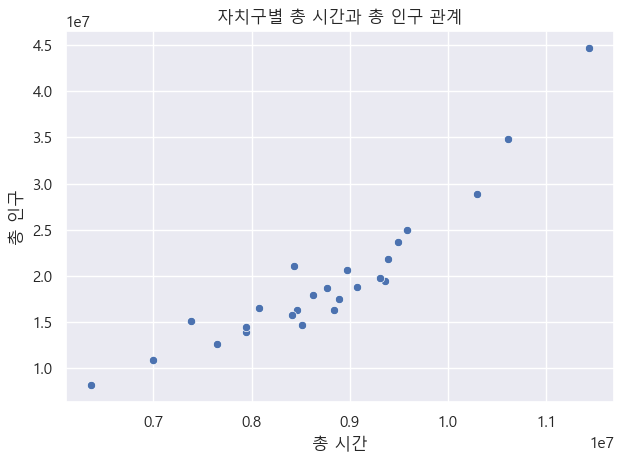

In [42]:
sns.scatterplot(x='총 시간', y='총 인구', data=df)
plt.title('자치구별 총 시간과 총 인구 관계')
plt.xlabel('총 시간')
plt.ylabel('총 인구')
plt.tight_layout()
plt.show()